In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import cifar10
import numpy as np

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


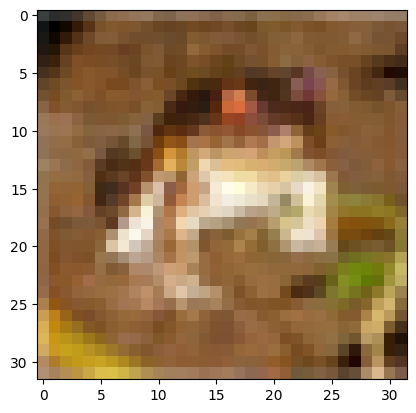

[6]


In [2]:
#load dataset
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
print(X_train[0])
plt.imshow(X_train[0])
plt.show()
print(y_train[0])

In [3]:
#preprocess the data
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=(0.2))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4425 - loss: 1.5744 - val_accuracy: 0.4021 - val_loss: 1.6628
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4425 - loss: 1.5674 - val_accuracy: 0.4247 - val_loss: 1.6303
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4469 - loss: 1.5600 - val_accuracy: 0.4313 - val_loss: 1.6065
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4456 - loss: 1.5571 - val_accuracy: 0.4241 - val_loss: 1.6262
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4501 - loss: 1.5443 - val_accuracy: 0.4090 - val_loss: 1.6582
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4514 - loss: 1.5436 - val_accuracy: 0.4364 - val_loss: 1.5903
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4539 - loss: 1.5408 - val_accuracy: 0.4266 - val_loss: 1.6183
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4566 - loss: 1.5301 - val_accuracy: 0.

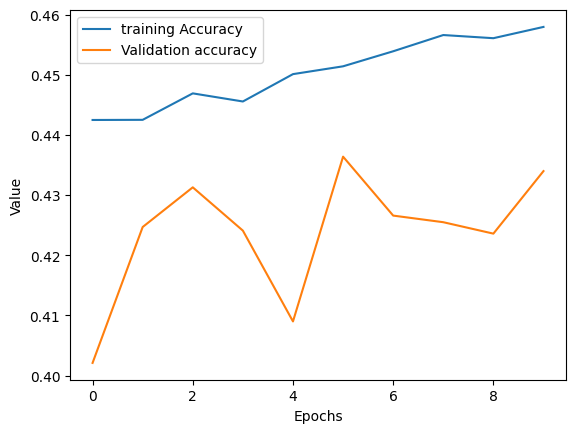

In [10]:
plt.plot(history.history['accuracy'], label='training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

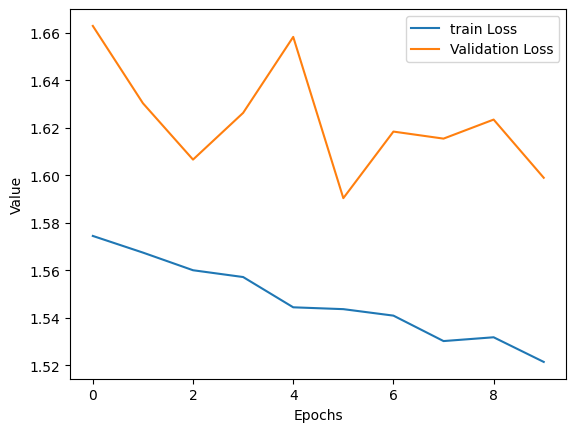

In [11]:
plt.plot(history.history['loss'], label='train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()